This is the notebook containing the solution for project 1 of the Udacity Data Science Nanodegree.

Data for COVID-19 related parameters from https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv was used.

Part I: When are we finally done with COVID-19. Here, two models are created to predict the vaccination process in the USA and Germany. The question is, when 80% of the population are fully vaccinated to reach herd immunity

In [53]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#from sklearn.impute import KNNImputer
#import AllTogether as t
#import seaborn as sns
%matplotlib inline

df = pd.read_csv('./owid-covid-data.csv')
#df.head()

In [54]:
#Get all rows for the two countries and drop rows with no values for the parameter in question
ger_df = df[df['iso_code'].str.contains('DEU')]
ger_df = ger_df[ger_df['people_fully_vaccinated'].notna()]
usa_df = df[df['iso_code'].str.contains('USA')]
usa_df = usa_df[usa_df['people_fully_vaccinated'].notna()]

In [55]:
#Create the y values for the two countries
#The X-values are the number of days since the start of the vaccination process

#Gett all rows of the colum
y1 = ger_df.filter(items=['people_fully_vaccinated'])
#Fill all NaN with 0
y1 = y1.fillna(0);

#Get the row numbers and determine the minimum row number (first row of the entries for the country)
x_rowNum = ger_df.index[ger_df.iso_code == 'DEU']
minRowNum = ger_df.index[ger_df.iso_code == 'DEU'][0]

#Substract minimum row number to start at 0 and get a numpy array
x_rowNum = x_rowNum -minRowNum
x_rowNum = x_rowNum.to_numpy()

#Gett all rows of the colum
y3 = usa_df.filter(items=['people_fully_vaccinated'])
#Fill all NaN with 0
y3 = y3.fillna(0);

#Get the row numbers and determine the minimum row number (first row of the entries for the country)
x_rowNum_usa = usa_df.index[usa_df.iso_code == 'USA']
minRowNum_usa = usa_df.index[usa_df.iso_code == 'USA'][0]

#Substract minimum row number to start at 0 and get a numpy array
x_rowNum_usa = x_rowNum_usa - minRowNum_usa
x_rowNum_usa = x_rowNum_usa.to_numpy()

In [56]:
#X values are the row numbers
x = np.arange(ger_df.shape[0], dtype=float)
x_usa = np.arange(usa_df.shape[0], dtype=float)


0.9987242359593927
0.998835952712302
0.9974700033840941
0.9965484114016288


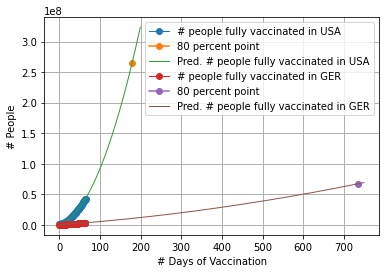

In [57]:
#fit the model and obtain pred response
lm_model_usa = LinearRegression(normalize=True)

#Looking at the data, we need a higher polynominal
#I need to reshape x because only have a single feature
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(x_rowNum_usa.reshape(-1, 1))

#Generate X-data to extrapolate the curve
X_future_usa = np.arange(0, 200, step=1)
X_future_usa_ = poly.fit_transform(X_future_usa.reshape(-1, 1))

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X_, y3['people_fully_vaccinated'], test_size=0.3, random_state=42)

#fit the model
lm_model_usa.fit(X_train, y_train);

#get the future prediction based on the model
y_future_preds_usa = lm_model_usa.predict(X_future_usa_);

#Print the 80% point of the population for herd immunity
X_future_usa_80 = np.arange(179, 180, step=1)
X_future_usa_80_ = poly.fit_transform(X_future_usa_80.reshape(-1, 1))
y_future_preds_usa_80 = lm_model_usa.predict(X_future_usa_80_);

#Print the score
print(lm_model_usa.score(X_, y3['people_fully_vaccinated']))
print(lm_model_usa.score(X_test, y_test))


#fit the model and obtain pred response
lm_model = LinearRegression(normalize=True)

#Looking at the data, we need a higher polynominal
#I need to reshape x because only have a single feature
X_ = poly.fit_transform(x_rowNum.reshape(-1, 1))

#Generate X-data to extrapolate the curve
X_future = np.arange(0, 750, step=1)
X_future_ = poly.fit_transform(X_future.reshape(-1, 1))

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X_, y1['people_fully_vaccinated'], test_size=0.3, random_state=42)

#fit the model
lm_model.fit(X_train, y_train);

#get the future prediction based on the model
y_future_preds = lm_model.predict(X_future_);

#Print the score
print(lm_model.score(X_, y1['people_fully_vaccinated']))
print(lm_model.score(X_test, y_test))

#Print the 80% point of the population for herd immunity
X_future_80 = np.arange(734, 735, step=1)
X_future_80_ = poly.fit_transform(X_future_80.reshape(-1, 1))
y_future_preds_80 = lm_model.predict(X_future_80_);

#Prepare the plot for USA
fig, ax = plt.subplots()
plt.grid(linestyle='-', linewidth=1)
plt.plot(x_rowNum_red_usa,y3_red,linewidth=1,label='# people fully vaccinated in USA', marker = 'o')
plt.plot(179, (usa_df['population'].iloc[0]) * 0.8,label='80 percent point', marker='o')
plt.plot(X_future_usa,y_future_preds_usa,linewidth=1,label='Pred. # people fully vaccinated in USA')

#Prepare the plot for Germany
plt.plot(x_rowNum_red,y1_red,linewidth=1,label='# people fully vaccinated in GER', marker='o')
plt.plot(734, (ger_df['population'].iloc[0]) * 0.8,label='80 percent point', marker='o')
plt.plot(X_future,y_future_preds,linewidth=1,label='Pred. # people fully vaccinated in GER')

#Plot
ax.set_ylabel('# People')
ax.set_xlabel('# Days of Vaccination')
plt.legend()
plt.show()

Part II:

In this part, I am trying to create a model tha predicts the rate of fully vaccinated people per hundered for a given country based on the other freatures of the country. In order to do thes, a liner model will be applied.

In [58]:
#Remove rows that do not provide the data that we are trying to investigate
df = df[df['people_fully_vaccinated_per_hundred'].notna()]

In [59]:
#Get the data for the most recent date with the maimum number of countries
actual_df = df[df['date'].str.contains('2021-03-15')]

#The data still contains "OWID" data that aggrigates some of the individual countries. Those rows need to be dropped as well
actual_df = actual_df[~actual_df.iso_code.str.contains("OWID")]

#Check new table -> 56 unique countries remain
#actual_df['iso_code'].describe()

In [60]:
#Now we have to drop the colums that contain absolute data for the vaccination process because that is obiously mostly related
#to the number of people fully vaccinated and we are trying to find features that influence vaccinations
actual_df = actual_df.drop(['new_vaccinations_smoothed_per_million'], axis = 1)
actual_df = actual_df.drop(['people_vaccinated_per_hundred'], axis = 1)
actual_df = actual_df.drop(['total_vaccinations_per_hundred'], axis = 1)
actual_df = actual_df.drop(['new_vaccinations_smoothed'], axis = 1)
actual_df = actual_df.drop(['new_vaccinations'], axis = 1)
actual_df = actual_df.drop(['people_fully_vaccinated'], axis = 1)
actual_df = actual_df.drop(['people_vaccinated'], axis = 1)
actual_df = actual_df.drop(['total_vaccinations'], axis = 1)

In [61]:
# As total cases is a valuable indicator, drop the rows that contain NaN here. Imputing does not make sense here as
#it would bias the data
actual_df = actual_df[actual_df['total_cases_per_million'].notna()]

#Dropping coloums with NaN entries. Imputing values does not make sense here
actual_df = actual_df.dropna(axis=1, how='any')

In [62]:
#Helper functions taken from the course

def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

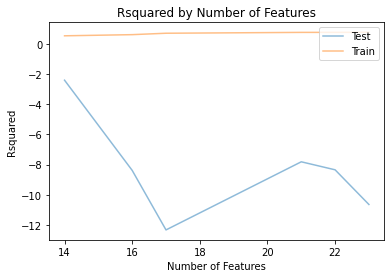

-2.403775037423565
0.7769935296683523


In [63]:
#Setting the model, finding the best values.

#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 1000, 500, 100, 50, 30, 25, 10, 5, 1]

#Only select colums of data type numbers (bascally just dropping the name of the country)
X = actual_df.select_dtypes(['number'])

#Dropping the column that is going to be modeled (i.e. the y)
X = X.drop(['people_fully_vaccinated_per_hundred'], axis = 1)

#Create y-data
y1 = actual_df.filter(items=['people_fully_vaccinated_per_hundred'])


#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y1, cutoffs)

#prnt the scores
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_train)]) # The model we should implement train_r2

In [64]:
#Helper function modified from the course
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df_7 = pd.DataFrame()
    coefs_df_7['Prameter'] = (X_train.columns)
    coefs_df_7['coefs'] =  coefficients.ravel()
    coefs_df_7['abs_coefs'] = np.abs(coefficients.ravel())
    coefs_df_7 = coefs_df_7.sort_values('abs_coefs', ascending=False)
    return coefs_df_7

In [65]:
#Investigate the coefficients
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,Prameter,coefs,abs_coefs
9,total_deaths_per_million,-1.748648e-02,1.748648e-02
13,cardiovasc_death_rate,-1.658771e-02,1.658771e-02
4,new_deaths,-1.157170e-02,1.157170e-02
5,new_deaths_smoothed,1.044730e-02,1.044730e-02
8,new_cases_smoothed_per_million,-9.106285e-03,9.106285e-03
7,new_cases_per_million,-6.086711e-03,6.086711e-03
6,total_cases_per_million,4.295003e-04,4.295003e-04
1,new_cases,3.203335e-04,3.203335e-04
11,population_density,-2.066259e-04,2.066259e-04
2,new_cases_smoothed,1.442347e-04,1.442347e-04


The r2 score of the test data above is not too good. Here, I'm trying to use all features

In [66]:
#fit the model and obtain pred response
lm_model_all_feat = LinearRegression(normalize=True)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y1['people_fully_vaccinated_per_hundred'], test_size=0.2, random_state=42)

lm_model_all_feat.fit(X_train_all, y_train_all);

print(lm_model_all_feat.score(X_train_all, y_train_all))
print(lm_model_all_feat.score(X_test_all, y_test_all))

0.7175317467906196
-7.449719019824565


In [67]:
#Quick look at the coefficients
testframe = pd.DataFrame()
testframe['X0'] = 0
testframe['human_development_index'] = 0
coef_df = coef_weights(lm_model_all_feat.coef_, X_train_all)

#A quick look at the top results
coef_df.head(20)

,Prameter,coefs,abs_coefs
22,human_development_index,71.854062,71.854062
15,median_age,-1.126993,1.126993
21,life_expectancy,1.039501,1.039501
12,reproduction_rate,-0.802399,0.802399
20,hospital_beds_per_thousand,-0.665789,0.665789
19,diabetes_prevalence,-0.661710,0.661710
16,aged_65_older,0.658008,0.658008
10,new_deaths_per_million,0.533112,0.533112
11,new_deaths_smoothed_per_million,0.150042,0.150042
5,new_deaths_smoothed,0.044515,0.044515


The r2 score is even worse. But here, the human development index is the main factor

Part III: What are the main factors contributing to the number of deaths by COVID 19 according to the data

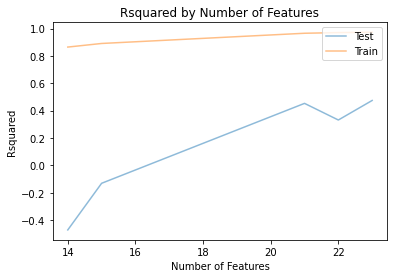

In [68]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [2500, 1000, 100, 50, 30, 25, 10, 5, 1]

X = actual_df.select_dtypes(['number'])
X = X.drop(['total_deaths_per_million'], axis = 1)
y1 = actual_df.filter(items=['total_deaths_per_million'])

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y1, cutoffs)

In [69]:
#print the scores
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_train)]) # The model we should implement train_r2

0.47448420343498887
0.9733499625909201


In [70]:
#Quick look at the coefficients
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,Prameter,coefs,abs_coefs
22,human_development_index,-2284.918988,2284.918988
11,reproduction_rate,326.944756,326.944756
10,new_deaths_smoothed_per_million,52.589188,52.589188
20,hospital_beds_per_thousand,37.239532,37.239532
19,diabetes_prevalence,-33.991937,33.991937
16,aged_65_older,14.498972,14.498972
12,people_fully_vaccinated_per_hundred,-13.885862,13.885862
21,life_expectancy,13.071757,13.071757
9,new_deaths_per_million,-8.773697,8.773697
15,median_age,-1.354007,1.354007


The test set r2 is not too good again bt some trends are isible here. It seems countries with smaller human development indicies and higher reproduction rates are more prone to COVID-19 deaths